<h1 style = "test-align:center;">Over 43 Traffic Sign Classification </h1> 


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle
import random

## Data Loading

In [3]:
with open("./data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("./data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("./data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [4]:
X_train , y_train = train['features'], train["labels"]
print(X_train.shape)
print(y_train.shape)

(34799, 32, 32, 3)
(34799,)


In [5]:
X_test , y_test = test['features'], test["labels"]
print(X_test.shape)
print(y_test.shape)

(12630, 32, 32, 3)
(12630,)


In [6]:
X_validation , y_validation = valid['features'], valid["labels"]
print(X_validation.shape)
print(y_validation.shape)

(4410, 32, 32, 3)
(4410,)


### IMAGES VISUALIZATION

4

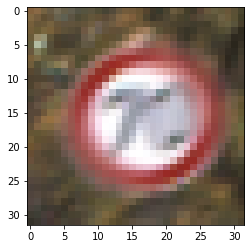

In [7]:
i = np.random.randint(1, len(X_train))
plt.imshow(X_train[i])
y_train[i]

## Displaying Images In Grid

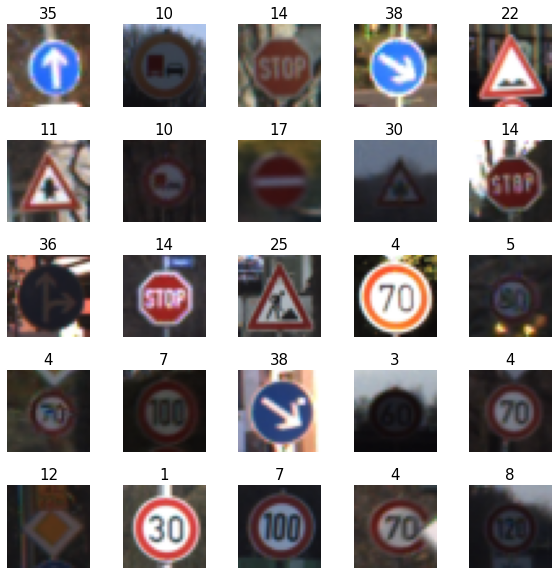

In [8]:
W_grid = 5
L_grid = 5

fig, axes = plt.subplots(L_grid, W_grid, figsize = (10,10))

axes = axes.ravel() 

n_training = len(X_train) 

for i in np.arange(0,W_grid*L_grid):   
    index = np.random.randint(0,n_training)

    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index],fontsize=15)
    axes[i].axis("Off")

plt.subplots_adjust(hspace=0.4)
        

### CONVERTING IMAGES TO GRAYSCALE AND PERFORMING NORMALIZATION

In [9]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)
X_validation , y_validation = shuffle(X_validation , y_validation)
X_test,y_test = shuffle(X_test,y_test)

In [10]:
# Grayscale
X_train_gray = np.sum(X_train/3,axis=3,keepdims = True)
X_validation_gray = np.sum(X_validation/3,axis=3,keepdims = True)
X_test_gray = np.sum(X_test/3,axis=3,keepdims = True)

In [11]:
print(X_train_gray.shape)
print(X_validation_gray.shape)
print(X_test_gray.shape)

(34799, 32, 32, 1)
(4410, 32, 32, 1)
(12630, 32, 32, 1)


In [12]:
# Normalization
X_train_gray_norm = (X_train_gray -128)/128
X_validation_gray_norm = (X_validation_gray -128)/128
X_test_gray_norm = (X_test_gray -128)/128
X_validation_gray_norm.shape

(4410, 32, 32, 1)

In [13]:
# X_train_gray_norm

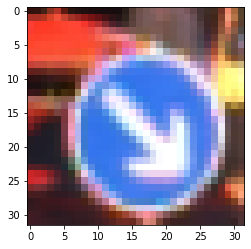

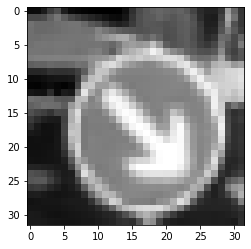

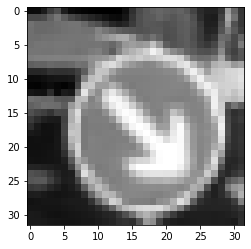

In [14]:
i = random.randint(1, len(X_train_gray))
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap = 'gray')

### CONVOLUTIONAL NEURAL NETWORK MODEL

In [15]:
from tensorflow.keras import datasets, layers, models

CNN = models.Sequential()

CNN.add(layers.Conv2D(6,(5,5),activation="relu" , input_shape=(32,32,1)))
CNN.add(layers.AveragePooling2D())
CNN.add(layers.Dropout(0.20))

CNN.add(layers.Conv2D(16,(5,5),activation="relu"))
CNN.add(layers.AveragePooling2D())

CNN.add(layers.Flatten())

CNN.add(layers.Dense(120, activation = "relu"))
CNN.add(layers.Dense(84, activation = "relu"))
CNN.add(layers.Dense(43, activation = "softmax"))

CNN.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               4

### COMPILE AND TRAIN DEEP CNN MODEL

In [16]:
CNN.compile(optimizer="Adam" , loss = "sparse_categorical_crossentropy" , metrics = ['accuracy'])

In [17]:
history = CNN.fit(X_train_gray_norm,y_train, batch_size = 500 ,epochs = 5 , verbose =1,
                 validation_data = (X_validation_gray_norm,y_validation))

Epoch 1/5
70/70 [==============================] - 2s 26ms/step - loss: 3.3222 - accuracy: 0.1275 - val_loss: 3.0925 - val_accuracy: 0.2061
Epoch 2/5
70/70 [==============================] - 1s 14ms/step - loss: 2.1302 - accuracy: 0.4051 - val_loss: 1.6671 - val_accuracy: 0.5014
Epoch 3/5
70/70 [==============================] - 1s 15ms/step - loss: 1.1707 - accuracy: 0.6560 - val_loss: 1.0315 - val_accuracy: 0.6916
Epoch 4/5
70/70 [==============================] - 1s 14ms/step - loss: 0.8029 - accuracy: 0.7653 - val_loss: 0.7947 - val_accuracy: 0.7542
Epoch 5/5
70/70 [==============================] - 1s 15ms/step - loss: 0.6604 - accuracy: 0.8081 - val_loss: 0.6839 - val_accuracy: 0.7957


### Evaluate Model

In [18]:
score = CNN.evaluate(X_test_gray_norm, y_test)
print('Test Accuracy: {}'.format(score[1]))

395/395 [==============================] - 2s 6ms/step - loss: 0.9002 - accuracy: 0.7873
Test Accuracy: 0.787331759929657


In [19]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [20]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation loss')

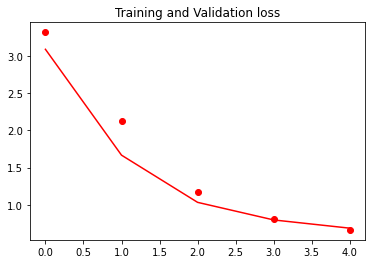

In [21]:
epochs = range(len(accuracy))
plt.plot(epochs , loss ,'ro',label="Training loss")
plt.plot(epochs , val_loss , 'r' , label = "Validation Loss")
plt.title("Training and Validation loss")

Text(0.5, 1.0, 'Training and Validation Accuracy')

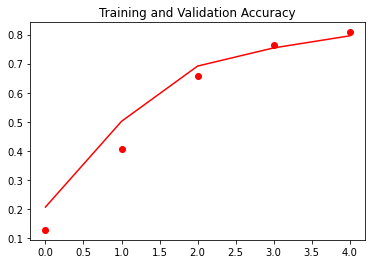

In [22]:
epochs = range(len(accuracy))
plt.plot(epochs , accuracy ,'ro',label="Training Accuracy")
plt.plot(epochs , val_accuracy , 'r' , label = "Validation Accuracy")
plt.title("Training and Validation Accuracy")

## Confusion Matrix

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


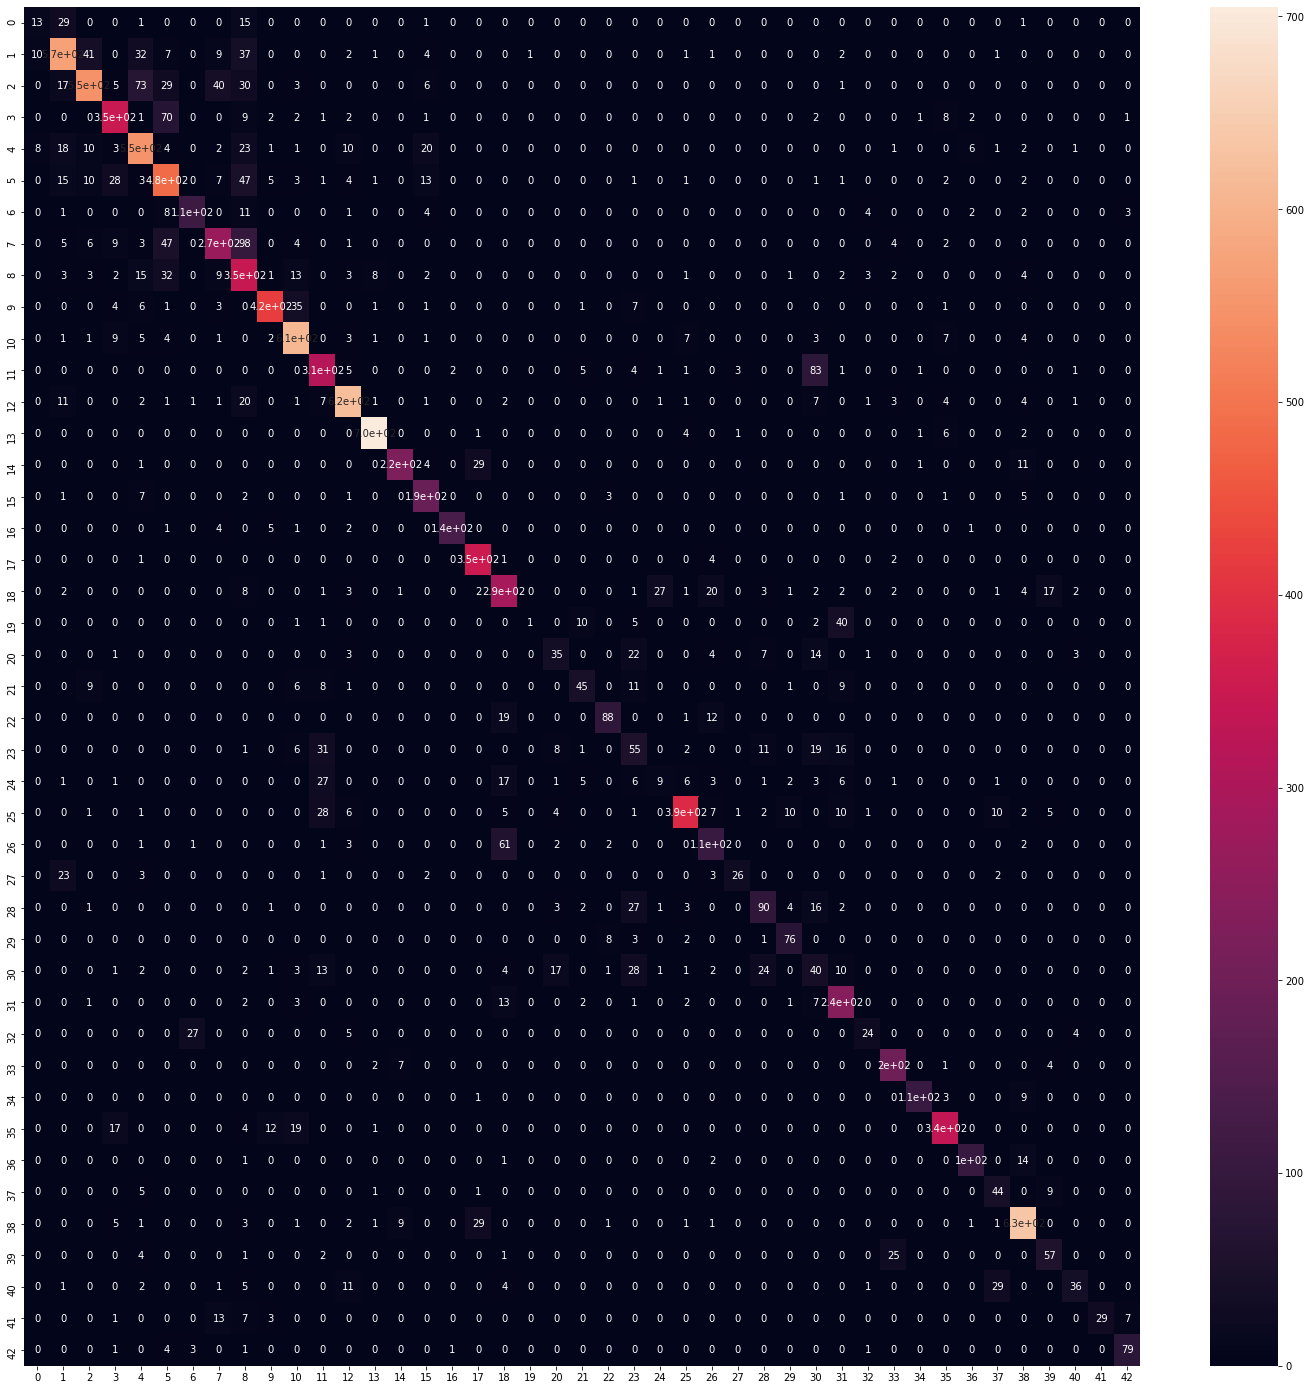

In [23]:
predicted_classes = CNN.predict_classes(X_test_gray_norm)
y_true = y_test

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)

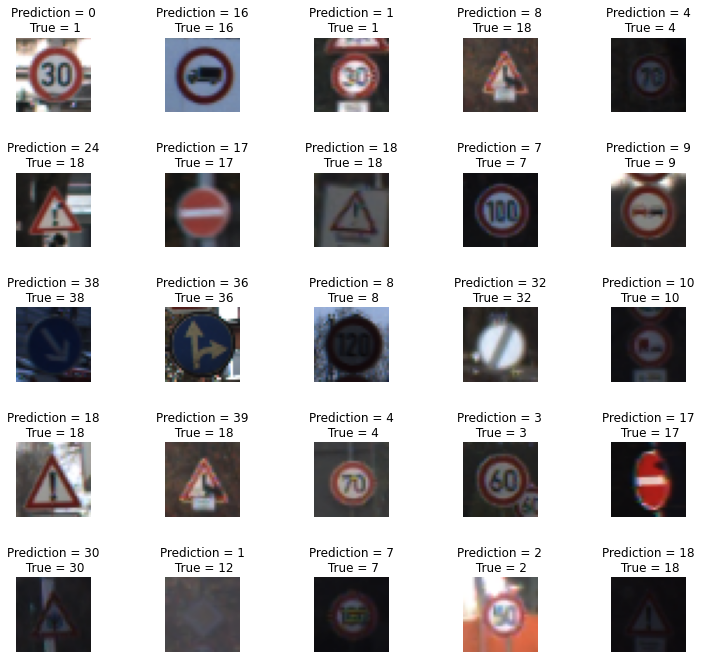

In [24]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)    

# APPENDIX

- In this case study, we want to classify images of traffic signs using deep Convolutional Neural Networks (CNNs).
- The dataset consists of 43 different classes of images. 
- Classes are as listed below: 
  - 0 = Speed limit (20km/h) 
  - 1 = Speed limit (30km/h)
  - 2 = Speed limit (50km/h) 
  - 3 = Speed limit (60km/h)
  - 4 = Speed limit (70km/h) 
  - 5 = Speed limit (80km/h)
  - 6 = End of speed limit (80km/h)
  - 7 = Speed limit (100km/h)
  - 8 = Speed limit (120km/h)
  - 9 = No passing
  - 10 = No passing for vehicles over 3.5 metric tons
  - 11 = Right-of-way at the next intersection
  - 12 = Priority road
  - 13 = Yield
  - 14 = Stop
  - 15 = No vehicles
  - 16 = Vehicles over 3.5 metric tons prohibited
  - 17 = No entry
  - 18 = General caution
  - 19 = Dangerous curve to the left
  - 20 = Dangerous curve to the right
  - 21 = Double curve
  - 22 = Bumpy road
  - 23 = Slippery road
  - 24 = Road narrows on the right
  - 25 = Road work
  - 26 = Traffic signals
  - 27 = Pedestrians
  - 28 = Children crossing 
  - 29 = Bicycles crossing
  - 30 = Beware of ice/snow
  - 31 = Wild animals crossing
  - 32 = End of all speed and passing limits
  - 33 = Turn right ahead
  - 34 = Turn left ahead
  - 35 = Ahead only
  - 36 = Go straight or right
  - 37 = Go straight or left
  - 38 = Keep right
  - 39 = Keep left
  - 40 = Roundabout mandatory
  - 41 = End of no passing
  - 42 = End of no passing by vehicles over 3.5 metric tons

- Citation
J. Stallkamp, M. Schlipsing, J. Salmen, and C. Igel. The German Traffic Sign Recognition Benchmark: A multi-class classification competition. In Proceedings of the IEEE International Joint Conference on Neural Networks, pages 1453–1460. 2011. 
@inproceedings{Stallkamp-IJCNN-2011, author = {Johannes Stallkamp and Marc Schlipsing and Jan Salmen and Christian Igel}, booktitle = {IEEE International Joint Conference on Neural Networks}, title = {The {G}erman {T}raffic {S}ign {R}ecognition {B}enchmark: A multi-class classification competition}, year = {2011}, pages = {1453--1460} }